In [6]:
# Graph Search Algorithms - Day 1
**Objetivo:** Implementar BFS (Breadth-First Search) do zero e perceber como funciona.
**Data:** 13 Fevereiro 2025

SyntaxError: invalid syntax (877645575.py, line 2)

In [23]:
from collections import deque

In [7]:
# Grafo simples representado como dicionário
# Cada nó mapeia para lista dos seus vizinhos

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Visualizar
print("Grafo criado!")
print("\nConexões:")
for node, neighbors in graph.items():
    print(f"  {node} → {neighbors}")


Grafo criado!

Conexões:
  A → ['B', 'C']
  B → ['A', 'D', 'E']
  C → ['A', 'F']
  D → ['B']
  E → ['B', 'F']
  F → ['C', 'E']


In [13]:
from collections import deque

# Testa a fila
fila = deque()
fila.append('A')
fila.append('B')
fila.append('C')

print("Fila:", fila)

primeiro = fila.popleft()
print("Retirei:", primeiro)
print("Fila agora:", fila)

Fila: deque(['A', 'B', 'C'])
Retirei: A
Fila agora: deque(['B', 'C'])


In [13]:
def bfs(graph, start, end):
    fila = deque([start])
    visitados = {start}
    parents = {start: None}
    while fila:
        current = fila.popleft()
        
        if current == end:
            caminho = []
            no = end
            
            while no is not None:
                caminho.append(no)
                no = parents[no]
            caminho.reverse()
            return caminho
        
        for neighbor in graph[current]:
            if neighbor not in visitados:
                visitados.add(neighbor)
                fila.append(neighbor)
                parents[neighbor]=current
    return None  
        

In [58]:
resultado = bfs(graph, 'A', 'F')
print(f"Caminho de A para F: {resultado}")

Caminho de A para F: ['A', 'C', 'F']


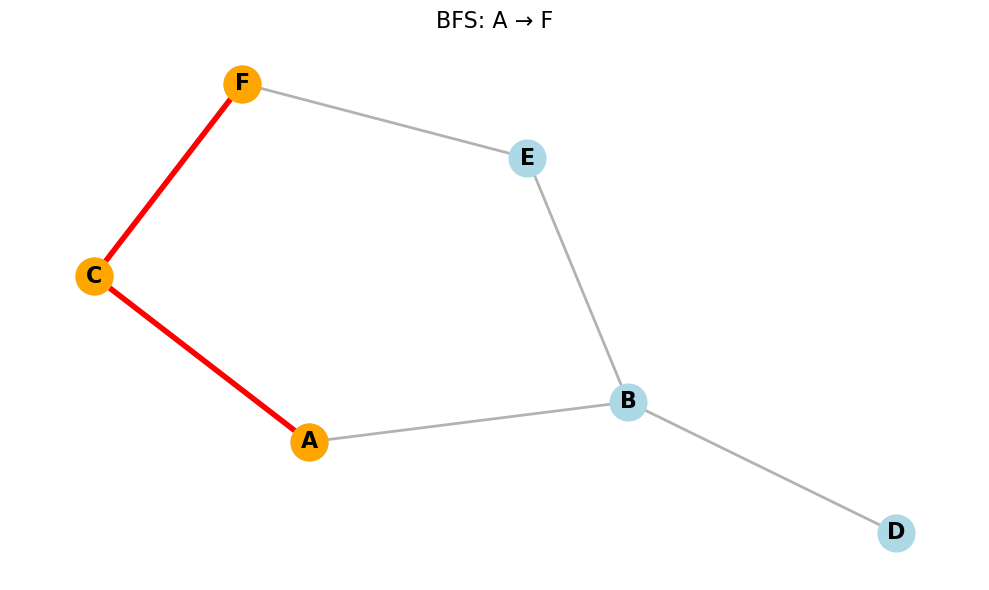

Caminho: A → C → F
Comprimento: 2 passos


In [62]:
#not me, just to visualize

import matplotlib.pyplot as plt
import networkx as nx

# Criar grafo NetworkX
G = nx.Graph(graph)

# Encontrar caminho
caminho = bfs(graph, 'A', 'F')

# Desenhar
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# Desenha todos os nós e edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.3)

# Destaca o caminho encontrado
if caminho:
    path_edges = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]
    nx.draw_networkx_edges(G, pos, path_edges, edge_color='red', width=4)
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='orange', node_size=700)

plt.title(f"BFS: {caminho[0]} → {caminho[-1]}", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Caminho: {' → '.join(caminho)}")
print(f"Comprimento: {len(caminho)-1} passos")

In [ ]:
## DFS - Depth First Search - Day 2

Explora o mais fundo possível antes de voltar atrás.
Usa **Stack** (LIFO - Last In, First Out)

In [1]:
# Demonstração de Stack
pilha = []

# Adicionar elementos
pilha.append('A')
pilha.append('B')
pilha.append('C')

print("Pilha:", pilha)

# Remover o ÚLTIMO (C)
ultimo = pilha.pop()
print("Removi:", ultimo)
print("Pilha agora:", pilha)

Pilha: ['A', 'B', 'C']
Removi: C
Pilha agora: ['A', 'B']


In [3]:
def dfs(graph, start, end):
    pilha = [start]
    visitados = {start}
    parents = {start: None}
    while pilha:
        current = pilha.pop()
        
        if current == end:
            caminho = []
            no = end
            
            while no is not None:
                caminho.append(no)
                no = parents[no]
            caminho.reverse()
            return caminho
        
        for neighbor in graph[current]:
            if neighbor not in visitados:
                visitados.add(neighbor)
                pilha.append(neighbor)
                parents[neighbor]=current
    return None  

In [9]:
caminho = dfs(graph, 'A', 'F')
print(f"DFS - Caminho de A para F: {caminho}")

DFS - Caminho de A para F: ['A', 'C', 'F']


In [29]:
caminho_bfs = bfs(graph, 'A', 'F')
caminho_dfs = dfs(graph, 'A', 'F')

print("BFS:", caminho_bfs)
print("DFS:", caminho_dfs)

BFS: ['A', 'C', 'F']
DFS: ['A', 'C', 'F']


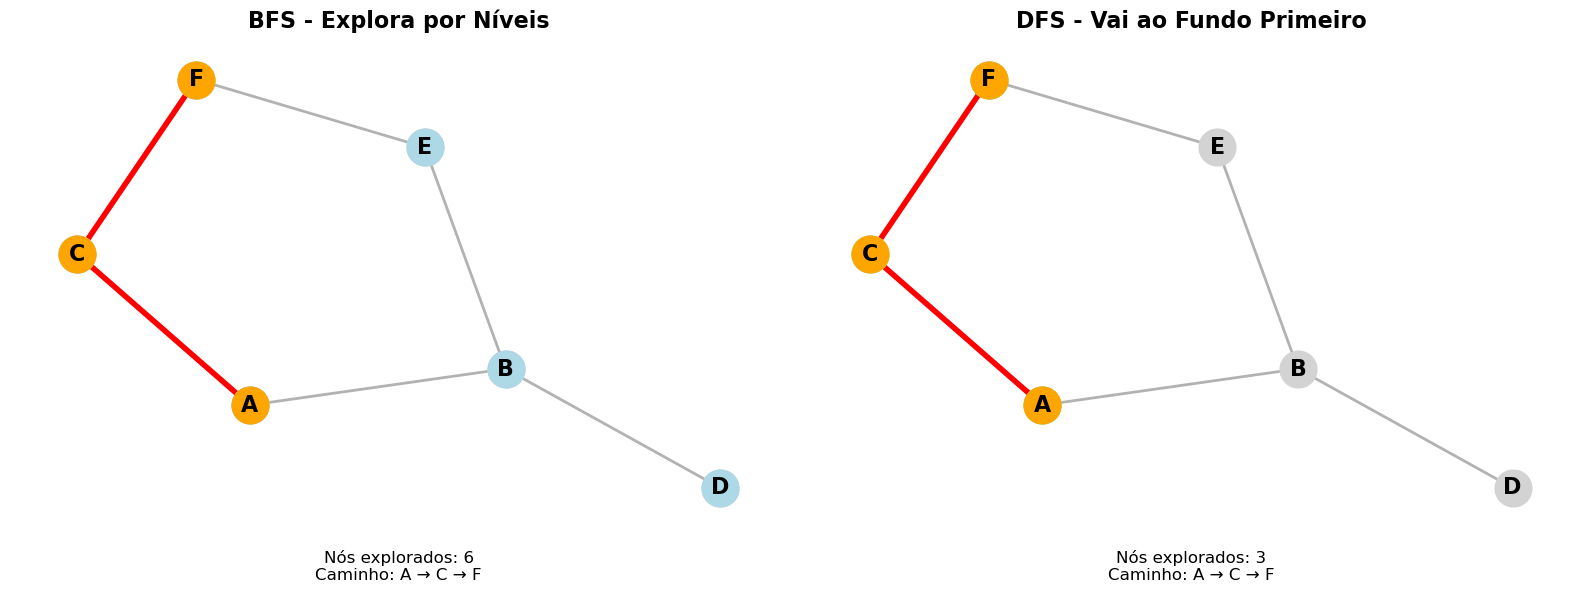

In [35]:
#not me, just to visualize
import matplotlib.pyplot as plt
import networkx as nx

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

G = nx.Graph(graph)
pos = nx.spring_layout(G, seed=42)

# BFS
ax1.set_title("BFS - Explora por Níveis", fontsize=16, fontweight='bold')
explorados_bfs = ['A', 'B', 'C', 'D', 'E', 'F']
caminho_bfs = ['A', 'C', 'F']

nx.draw_networkx_nodes(G, pos, ax=ax1, node_color='lightgray', node_size=700)
nx.draw_networkx_nodes(G, pos, nodelist=explorados_bfs, node_color='lightblue', 
                       node_size=700, ax=ax1)
nx.draw_networkx_nodes(G, pos, nodelist=caminho_bfs, node_color='orange', 
                       node_size=700, ax=ax1)
nx.draw_networkx_labels(G, pos, ax=ax1, font_size=16, font_weight='bold')
nx.draw_networkx_edges(G, pos, ax=ax1, width=2, alpha=0.3)
path_edges_bfs = [(caminho_bfs[i], caminho_bfs[i+1]) for i in range(len(caminho_bfs)-1)]
nx.draw_networkx_edges(G, pos, path_edges_bfs, edge_color='red', width=4, ax=ax1)
ax1.axis('off')
ax1.text(0.5, -0.1, f"Nós explorados: {len(explorados_bfs)}\nCaminho: {' → '.join(caminho_bfs)}", 
         ha='center', transform=ax1.transAxes, fontsize=12)

# DFS
ax2.set_title("DFS - Vai ao Fundo Primeiro", fontsize=16, fontweight='bold')
explorados_dfs = ['A', 'C', 'F']
caminho_dfs = ['A', 'C', 'F']

nx.draw_networkx_nodes(G, pos, ax=ax2, node_color='lightgray', node_size=700)
nx.draw_networkx_nodes(G, pos, nodelist=explorados_dfs, node_color='lightgreen', 
                       node_size=700, ax=ax2)
nx.draw_networkx_nodes(G, pos, nodelist=caminho_dfs, node_color='orange', 
                       node_size=700, ax=ax2)
nx.draw_networkx_labels(G, pos, ax=ax2, font_size=16, font_weight='bold')
nx.draw_networkx_edges(G, pos, ax=ax2, width=2, alpha=0.3)
path_edges_dfs = [(caminho_dfs[i], caminho_dfs[i+1]) for i in range(len(caminho_dfs)-1)]
nx.draw_networkx_edges(G, pos, path_edges_dfs, edge_color='red', width=4, ax=ax2)
ax2.axis('off')
ax2.text(0.5, -0.1, f"Nós explorados: {len(explorados_dfs)}\nCaminho: {' → '.join(caminho_dfs)}", 
         ha='center', transform=ax2.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

In [58]:
#Practice
graph_teste = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B'],
    'E': ['F'],
    'F': ['E']
}
def encontrar_alcancaveis(graph, start):
    fila=deque([start])
    visitados={start}
    while fila:
        current=fila.popleft()
        for neighbor in graph[current]:
            if neighbor not in visitados:
                visitados.add(neighbor)
                fila.append(neighbor)
    return list(visitados)

In [60]:
print("Alcançáveis de A:", encontrar_alcancaveis(graph_teste, 'A'))
print("Alcançáveis de E:", encontrar_alcancaveis(graph_teste, 'E'))

Alcançáveis de A: ['B', 'A', 'C', 'D']
Alcançáveis de E: ['E', 'F']


In [70]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
def distancia_minima(graph, start, end):
    distancias = {start: 0}
    fila=deque([start])
    visitados={start}
    
    while fila:
        current=fila.popleft()
        
        if current==end:
            return distancias[end]
            
        for neighbor in graph[current]:
            
            if neighbor not in visitados:
                distancias[neighbor] = distancias[current] + 1
                visitados.add(neighbor)
                fila.append(neighbor)
    return -1

In [72]:
print("A → F:", distancia_minima(graph, 'A', 'F'))  
print("A → D:", distancia_minima(graph, 'A', 'D'))  
print("A → A:", distancia_minima(graph, 'A', 'A'))  
print("A → B:", distancia_minima(graph, 'A', 'B'))

A → F: 2
A → D: 2
A → A: 0
A → B: 1


In [76]:
def bfs_v2(graph, start, end):
    fila=deque([start])
    visitados={start}
    parents= {start: None}
    while fila:
        current=fila.popleft()
        if current == end:
            caminho = []
            no = end
            while no is not None:
                caminho.append(no)
                no = parents[no]
            caminho.reverse()
            return caminho
        for neighbour in graph[current]:
            if neighbour not in visitados:
                visitados.add(neighbour)
                fila.append(neighbour)
                parents[neighbour]=current
    return None

In [78]:
print(bfs_v2(graph, 'A', 'F'))
print(bfs_v2(graph, 'A', 'D'))
print(bfs_v2(graph, 'B', 'C'))

['A', 'C', 'F']
['A', 'B', 'D']
['B', 'A', 'C']


In [80]:
def dfs_v2(graph, start, end):
    pilha=[start]
    visitados={start}
    parents= {start: None}
    while pilha:
        current=pilha.pop()
        if current == end:
            caminho = []
            no = end
            while no is not None:
                caminho.append(no)
                no = parents[no]
            caminho.reverse()
            return caminho
        for neighbour in graph[current]:
            if neighbour not in visitados:
                visitados.add(neighbour)
                pilha.append(neighbour)
                parents[neighbour]=current
    return None

In [82]:
print(dfs_v2(graph, 'A', 'F'))
print(dfs_v2(graph, 'A', 'D'))
print(dfs_v2(graph, 'B', 'C'))

['A', 'C', 'F']
['A', 'B', 'D']
['B', 'E', 'F', 'C']


In [96]:
def tem_ciclo(graph):
    visitados = set()
    
    # Tens que verificar todos os nós
    # (grafo pode ter partes desconectadas)
    for no in graph:
        if no not in visitados:
            if dfs_ciclo(graph, no, visitados, None):  # Chama função auxiliar
                return True
    
    return False

def dfs_ciclo(graph, current, visitados, parent):
    visitados.add(current)
    
    for neighbour in graph[current]:
        if neighbour not in visitados:
            if dfs_ciclo(graph, neighbour, visitados, current):
                return True
        elif neighbour != parent:  # ← Vizinho visitado que não é parent
            return True
    
    return False

In [98]:
graph_ciclo = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C']
}

graph_arvore = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B']
}

print("Tem ciclo?", tem_ciclo(graph_ciclo))   # True
print("Tem ciclo?", tem_ciclo(graph_arvore))  # False

Tem ciclo? True
Tem ciclo? False


In [ ]:
📋 Exercícios (Ordem Crescente)
Exercício 1: Contar Componentes Conectados ⭐
Problema:
Dado um grafo, contar quantos "grupos" separados existem.
Exemplo:
pythongraph = {
    'A': ['B'],
    'B': ['A'],
    'C': ['D'],
    'D': ['C'],
    'E': []
}

# Grupo 1: A-B
# Grupo 2: C-D  
# Grupo 3: E (sozinho)
# Total: 3 componentes

In [22]:
from collections import deque
def explorar(graph, start, visitados):
    fila=deque([start])
    visitados.add(start)
    while fila:
        current = fila.popleft()
        for neighbour in graph[current]:
            if neighbour not in visitados:
                visitados.add(neighbour)
                fila.append(neighbour)
    
    return None
def contar_componentes(graph):
    visitados = set() 
    contador=0
    for no in graph:
       if no not in visitados:
            explorar(graph, no, visitados)
            contador+=1
    return contador

In [24]:
graph = {
    'A': ['B'],
    'B': ['A'],
    'C': ['D'],
    'D': ['C'],
    'E': []
}

print(contar_componentes(graph))  # Deve dar 3

3


In [ ]:
📋 Exercícios (Ordem Crescente)
Exercício 2: Caminho Existe? ⭐
Problema:
Verificar se existe caminho entre dois nós (retorna True/False).
Sem reconstruir caminho, só verificar.

In [5]:
def existe_caminho(graph,start,end):
    pilha=[start]
    visitados={start}
    while pilha:
        current=pilha.pop()
        if current==end:
            return True
        for neighbour in graph[current]:
            if neighbour not in visitados:
                visitados.add(neighbour)
                pilha.append(neighbour)
    return False

In [7]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B']
}

print(existe_caminho(graph, 'A', 'D'))  # Deve dar True
print(existe_caminho(graph, 'A', 'Z'))  # Deve dar erro (Z não existe)


True
False


In [ ]:
Exercício 3: Todos os Caminhos ⭐⭐
Este é mais difícil - precisa de DFS com backtracking.

Problema:
Encontrar TODOS os caminhos possíveis entre start e end.
Exemplo:
pythongraph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': []
}
```

Visualmente:
```
    A
   / \
  B   C
   \ /
    D
Caminhos de A para D:

A → B → D
A → C → D

In [ ]:
def todos_caminhos(graph, start, end):
    todos = []  # Lista para guardar todos os caminhos
    caminho_atual = []  # Caminho que estamos a construir
    visitados = set()  # Nós visitados no caminho atual
    
    def dfs(no):
        # Adiciona nó ao caminho atual
        caminho_atual.append(no)
        visitados.add(no)
        
        if no == end:
            # Encontrou! Guarda cópia do caminho
            todos.append(caminho_atual.copy())  # ← .copy() é importante!
        else:
            # Explora vizinhos
            for vizinho in graph[no]:
                if vizinho not in visitados:
                    dfs(vizinho)  # ← Recursão
        
        # BACKTRACK: remove nó do caminho e visitados
        caminho_atual.pop()
        visitados.remove(no)
    
    dfs(start)  # Começa busca
    return todos

In [ ]:
---

## Dijkstra - Shortest Path em Grafos com Pesos

**Data:** 24/02/2025

**Problema:** BFS assume todas arestas = 1. E se tiverem pesos diferentes?

**Solução:** Dijkstra - explora por ordem de custo crescente

In [1]:
import heapq
from collections import deque

In [3]:
# Grafo com pesos
graph_weighted = {
    'A': {'B': 5, 'C': 2},
    'B': {'C': 1, 'D': 3},
    'C': {'D': 4},
    'D': {}
}

# Visualização
print("Grafo com pesos:")
for node, neighbors in graph_weighted.items():
    print(f"  {node} → {neighbors}")

Grafo com pesos:
  A → {'B': 5, 'C': 2}
  B → {'C': 1, 'D': 3}
  C → {'D': 4}
  D → {}


In [27]:
#Template
def dijkstra(graph, start, end):
    """
    Dijkstra: Shortest path em grafos com pesos
    """
    # Priority queue: (distância, nó)
    pq = [(0, start)]
    
    # Distâncias mínimas conhecidas
    distancias = {start: 0}
    
    # Parents para reconstruir caminho
    parents = {start: None}
    
    # Visitados
    visitados = set()
    
    while pq:
        dist_atual, atual = heapq.heappop(pq)
        
        if atual in visitados:
            continue
        
        visitados.add(atual)
        
        if atual == end: # TODO: Reconstruir caminho (igual a BFS!)
            caminho = []
            no = end 
            while no is not None:
                caminho.append(no)
                no=parents[no]
            caminho.reverse()
            return caminho
                
        
        # Explorar vizinhos
        for vizinho, peso in graph[atual].items():
            nova_dist = dist_atual + peso
            
            if vizinho not in distancias or nova_dist < distancias[vizinho]:
                distancias[vizinho] = nova_dist
                parents[vizinho] = atual
                heapq.heappush(pq, (nova_dist, vizinho))
    
    return None

In [25]:
# Teste 1: Caminho simples
caminho = dijkstra(graph_weighted, 'A', 'D')
print(f"Caminho A→D: {caminho}")

# Teste 2: Distância total
if caminho:
    dist_total = 0
    for i in range(len(caminho)-1):
        atual = caminho[i]
        proximo = caminho[i+1]
        peso = graph_weighted[atual][proximo]
        dist_total += peso
        print(f"  {atual}→{proximo}: {peso}")
    print(f"Distância total: {dist_total}")
    

NameError: name 'graph_weighted' is not defined

In [17]:
#Comparison with BFS
def bfs_weighted(graph, start, end):
    fila=deque([start])
    visitados={start}
    parents={start: None}
    while fila:
        atual=fila.popleft()
        if atual == end:
            caminho=[]
            no=end
            while no is not None:
                caminho.append(no)
                no=parents[no]
            caminho.reverse()
            return caminho
        for vizinho in graph[atual].keys():  # ← Ignora pesos!
            if vizinho not in visitados:
                visitados.add(vizinho)
                parents[vizinho]=atual
                fila.append(vizinho)
    return None

In [19]:
caminho_bfs = bfs_weighted(graph_weighted, 'A', 'D')
print(f"BFS: {caminho_bfs}")

# Calcula distância
if caminho_bfs:
    dist = 0
    for i in range(len(caminho_bfs)-1):
        dist += graph_weighted[caminho_bfs[i]][caminho_bfs[i+1]]
    print(f"BFS distância: {dist}")

print(f"\nDijkstra: {caminho}")
print(f"Dijkstra distância: 6")

NameError: name 'graph_weighted' is not defined

In [51]:
graph_cidades = {
    'Lisboa': {'Porto': 100, 'Faro': 50},
    'Porto': {'Lisboa': 100, 'Madrid': 80},
    'Faro': {'Lisboa': 50, 'Coimbra': 30},
    'Coimbra': {'Faro': 30, 'Madrid': 40},
    'Madrid': {'Porto': 80, 'Coimbra': 40}
}
#Objetivo:
#Encontrar caminho mais curto de Lisboa para Madrid.


In [53]:
caminho = dijkstra(graph_cidades, 'Lisboa', 'Madrid')
print(f"Caminho: {caminho}")
if caminho:
    dist_total = 0
    for i in range(len(caminho)-1):
        cidade_atual = caminho[i]
        proxima = caminho[i+1]
        km = graph_cidades[cidade_atual][proxima]
        print(f"  {cidade_atual} -> {proxima}: {km}km")
        dist_total += km
    print(f"Total: {dist_total}km")

Caminho: ['Lisboa', 'Faro', 'Coimbra', 'Madrid']
  Lisboa -> Faro: 50km
  Faro -> Coimbra: 30km
  Coimbra -> Madrid: 40km
Total: 120km


In [55]:
caminho_bfs = bfs_weighted(graph_cidades, 'Lisboa', 'Madrid')
print(f"\nBFS caminho: {caminho_bfs}")
if caminho_bfs:
    dist_total = 0
    for i in range(len(caminho_bfs)-1):
        cidade_atual = caminho_bfs[i]
        proxima = caminho_bfs[i+1]
        km = graph_cidades[cidade_atual][proxima]
        print(f"  {cidade_atual} -> {proxima}: {km}km")
        dist_total += km
    print(f"Total: {dist_total}km")


BFS caminho: ['Lisboa', 'Porto', 'Madrid']
  Lisboa -> Porto: 100km
  Porto -> Madrid: 80km
Total: 180km


In [1]:
rede_distribuicao = {
    'Armazem': {'Hospital_A': 45, 'Centro_1': 15, 'Centro_2': 30},
    'Centro_1': {'Armazem': 15, 'Hospital_A': 20, 'Hospital_B': 50},
    'Centro_2': {'Armazem': 30, 'Hospital_B': 25, 'Hospital_C': 40},
    'Hospital_A': {'Centro_1': 20, 'Armazem': 45},
    'Hospital_B': {'Centro_1': 50, 'Centro_2': 25},
    'Hospital_C': {'Centro_2': 40}
}

In [37]:
import heapq
def dijkstra(graph, start, end):
    pq=[(0, start)]
    distancias={start: 0}
    parents={start: None}
    visitados=set()
    while pq:
        distancia_atual, atual=heapq.heappop(pq)
        if atual in visitados:
            continue
        visitados.add(atual)
        if atual==end:
            caminho=[]
            no=end
            while no is not None:
                caminho.append(no)
                no=parents[no]
            caminho.reverse()
            return caminho
        for vizinho, peso in graph[atual].items():
            nova_dist=distancia_atual+peso
            if vizinho not in distancias or nova_dist < distancias[vizinho]:
                distancias[vizinho] = nova_dist
                parents[vizinho] = atual
                heapq.heappush(pq, (nova_dist, vizinho))
    return None

In [39]:
caminho = dijkstra(rede_distribuicao, 'Armazem', 'Hospital_B')
print(f"Caminho: {caminho}")

NameError: name 'rede_distribuicao' is not defined

In [13]:
if caminho:
    tempo_total = 0
    for i in range(len(caminho) - 1):
        origem = caminho[i]
        destino = caminho[i + 1]
        tempo = rede_distribuicao[origem][destino]
        print(f"  {origem} → {destino}: {tempo} min")
        tempo_total += tempo
    print(f"Tempo total: {tempo_total} min")

  Armazem → Centro_2: 30 min
  Centro_2 → Hospital_B: 25 min
Tempo total: 55 min


In [29]:
caminho_bfs = bfs_weighted(rede_distribuicao, 'Armazem', 'Hospital_B')
print(f"\nBFS caminho: {caminho_bfs}")

# Calcula tempo do BFS
if caminho_bfs:
    tempo_bfs = 0
    for i in range(len(caminho_bfs) - 1):
        origem = caminho_bfs[i]
        destino = caminho_bfs[i + 1]
        tempo = rede_distribuicao[origem][destino]
        print(f"  {origem} → {destino}: {tempo} min")
        tempo_bfs += tempo
    print(f"BFS tempo total: {tempo_bfs} min")

print(f"\n📊 Comparação:")
print(f"Dijkstra: {tempo_total} min")
print(f"BFS: {tempo_bfs} min")
print(f"Diferença: {tempo_bfs - tempo_total} min")


BFS caminho: ['Armazem', 'Centro_1', 'Hospital_B']
  Armazem → Centro_1: 15 min
  Centro_1 → Hospital_B: 50 min
BFS tempo total: 65 min

📊 Comparação:
Dijkstra: 55 min
BFS: 65 min
Diferença: 10 min


In [31]:
print("\n=== Desafio 3: Armazem → Hospital_C ===")
caminho_dij = dijkstra(rede_distribuicao, 'Armazem', 'Hospital_C')
caminho_bfs = bfs_weighted(rede_distribuicao, 'Armazem', 'Hospital_C')

print(f"Dijkstra: {caminho_dij}")
print(f"BFS: {caminho_bfs}")


=== Desafio 3: Armazem → Hospital_C ===
Dijkstra: ['Armazem', 'Centro_2', 'Hospital_C']
BFS: ['Armazem', 'Centro_2', 'Hospital_C']


In [ ]:
---

## A* (A-Star) - Pathfinding com Heurística

**Data:** [27-02-2026]

**Ideia:** Dijkstra + estimativa de distância até objetivo

**Key Innovation:** Prioriza caminhos que "apontam" para o objetivo

**Formula:** f(n) = g(n) + h(n)
- g(n) = distância percorrida até n
- h(n) = heurística (estimativa até objetivo)
- f(n) = prioridade total

In [13]:
import math

# Grafo com pesos (como Dijkstra)
graph_astar = {
    'A': {'B': 5, 'C': 2},
    'B': {'A': 5, 'D': 8},
    'C': {'A': 2, 'D': 3, 'E': 10},
    'D': {'B': 8, 'C': 3, 'F': 2},
    'E': {'C': 10, 'F': 5},
    'F': {'D': 2, 'E': 5}
}

# Coordenadas (x, y) de cada nó
posicao = {
    'A': (0, 0),
    'B': (5, 2),
    'C': (2, -2),
    'D': (7, -1),
    'E': (4, -5),
    'F': (10, -2)
}

In [19]:
def heuristica(no_atual, objetivo):
    x1, y1 = posicao[no_atual]
    x2, y2 = posicao[objetivo]
    return math.sqrt((x2-x1)**2 - (y1-y2)**2)

In [21]:
print(f"Heurística A→F: {heuristica('A', 'F'):.2f}")
print(f"Heurística D→F: {heuristica('D', 'F'):.2f}")

Heurística A→F: 9.80
Heurística D→F: 2.83


In [31]:
import heapq
def a_star(graph, start, end):
    pq = [(0+heuristica(start, end), start)]     
    distancias = {start: 0}  # é o g(n) - distância percorrida
    parents = {start: None}
    visitados = set()
    
    while pq:
        prioridade_atual, atual = heapq.heappop(pq)
        
        if atual in visitados:
            continue
        visitados.add(atual)
        
        if atual == end:
            # Reconstruir caminho (igual)
            caminho = []
            no = end
            while no is not None:
                caminho.append(no)
                no = parents[no]
            caminho.reverse()
            return caminho
        
        for vizinho, peso in graph[atual].items():
            nova_dist = distancias[atual] + peso  # g(vizinho)
            
            if vizinho not in distancias or nova_dist < distancias[vizinho]:
                distancias[vizinho] = nova_dist
                parents[vizinho] = atual
                heapq.heappush(pq, (nova_dist+heuristica(vizinho, end), vizinho))
    
    return None

In [33]:
# Teste A*
caminho_astar = a_star(graph_astar, 'A', 'F')
print(f"A* caminho: {caminho_astar}")

# Calcula distância real
if caminho_astar:
    dist_total = 0
    for i in range(len(caminho_astar) - 1):
        origem = caminho_astar[i]
        destino = caminho_astar[i + 1]
        peso = graph_astar[origem][destino]
        print(f"  {origem} → {destino}: {peso}")
        dist_total += peso
    print(f"Distância total A*: {dist_total}")

A* caminho: ['A', 'C', 'D', 'F']
  A → C: 2
  C → D: 3
  D → F: 2
Distância total A*: 7


In [41]:
# Dijkstra no mesmo grafo
caminho_dij = dijkstra(graph_astar, 'A', 'F')
print(f"\nDijkstra caminho: {caminho_dij}")

if caminho_dij:
    dist_dij = 0
    for i in range(len(caminho_dij) - 1):
        origem = caminho_dij[i]
        destino = caminho_dij[i + 1]
        peso = graph_astar[origem][destino]
        print(f"  {origem} → {destino}: {peso}")
        dist_dij += peso
    print(f"Distância total Dijkstra: {dist_dij}")

print(f"\n📊 Comparação:")
print(f"A*: {caminho_astar} = {dist_total}")
print(f"Dijkstra: {caminho_dij} = {dist_dij}")


Dijkstra caminho: ['A', 'C', 'D', 'F']
  A → C: 2
  C → D: 3
  D → F: 2
Distância total Dijkstra: 7

📊 Comparação:
A*: ['A', 'C', 'D', 'F'] = 7
Dijkstra: ['A', 'C', 'D', 'F'] = 7
